In [ ]:
!pip uninstall tensorflow
!pip uninstall keras

In [9]:
!pip install mord
!pip install pandas
!pip install cache_decorator
!pip install scikit-learn
!pip install scikit-fuzzy
!pip install scikit-optimize
!pip install xgboost
!pip install scikeras
!pip install seaborn

     -------------------------------------- 293.3/293.3 kB 3.6 MB/s eta 0:00:00


In [13]:
import pandas as pd

# Load your CSV file
file_path = 'C:\\Users\\lassa\\OneDrive\\Desktop\\workspace\\VICTIMS_OF_FALL_MASTER_THESIS\\data\\victims_of_fall_V1 - Filtered.csv'  # Make sure to replace this with the correct path to your file
data = pd.read_csv(file_path)

# Calculate descriptive statistics for anthropological data
anthropological_stats = data[['Sex', 'Age', 'Height', 'Weight', 'BMI']].describe()

# Since 'Sex' is a categorical variable, 'describe()' won't include it in the output. Use 'value_counts()' for 'Sex'
sex_distribution = data['Sex'].value_counts()

display(anthropological_stats)
display(sex_distribution)

,Age,Height,Weight,BMI
count,341.000000,341.000000,341.000000,341.000000
mean,55.736070,165.953079,70.232551,25.350772
std,21.019896,9.740040,17.223352,5.098794
min,13.000000,140.000000,29.600000,12.683314
25%,38.000000,160.000000,58.000000,22.038567
50%,58.000000,166.000000,66.400000,24.687686
75%,74.000000,173.000000,81.000000,27.700831
max,95.000000,191.000000,141.000000,54.396050


M    190
F    151
Name: Sex, dtype: int64

ValueError: Invalid RGBA argument: 'coolwarm'

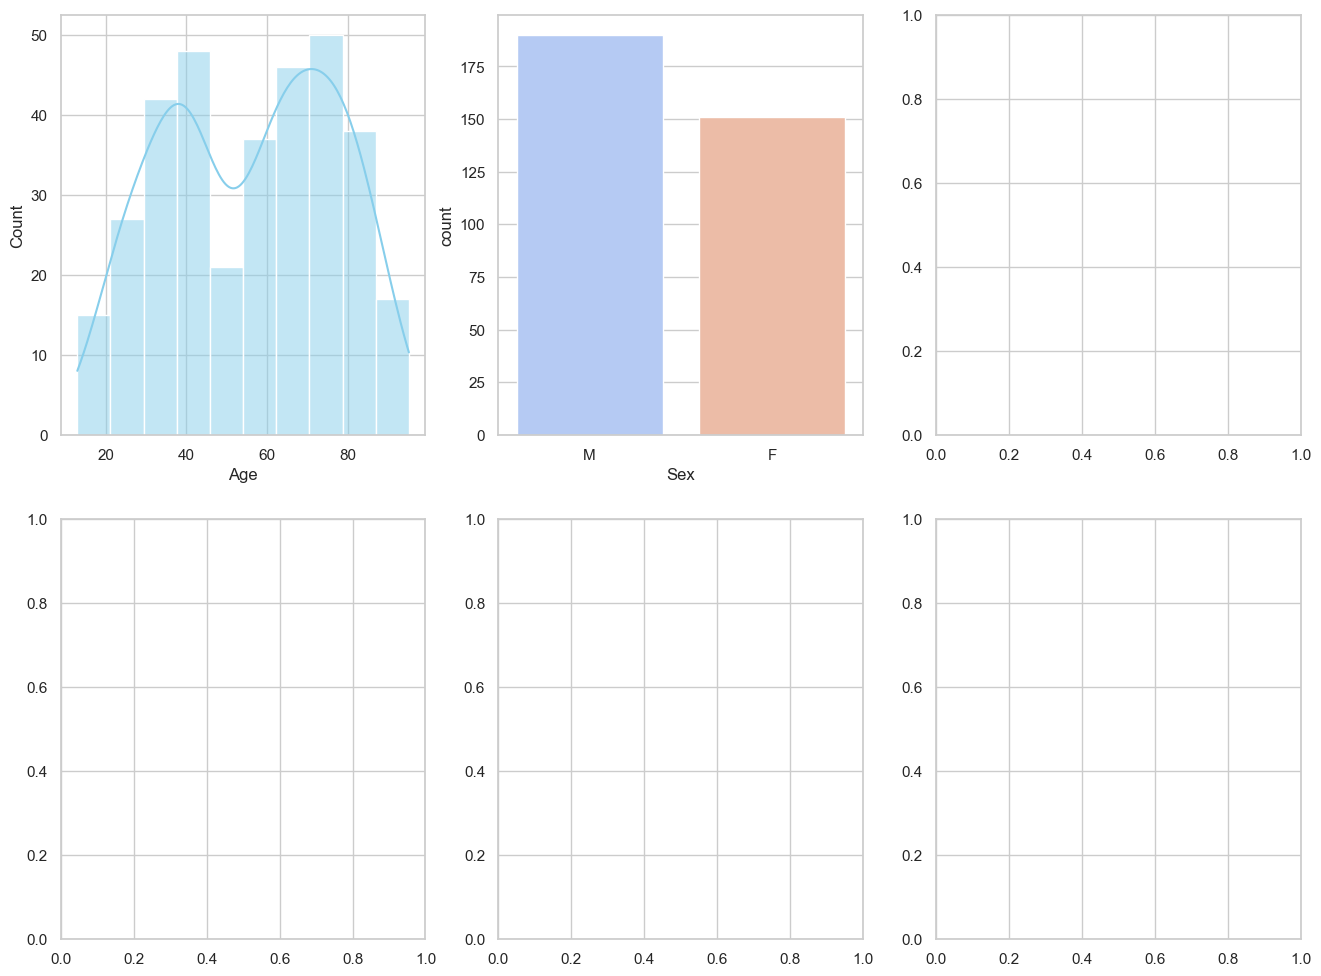

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Data loading step - assuming 'data' is already your DataFrame
# data = pd.read_csv('your_file_path_here.csv')  # Uncomment and use if running this anew

# Histograms for Age, Height, Weight, BMI
fig, axs = plt.subplots(2, 3, figsize=(16, 12))
sns.histplot(data=data, x="Age", kde=True, color="skyblue", ax=axs[0, 0])
sns.countplot(x='Sex', data=data, palette='coolwarm', ax=axs[0,1])
sns.histplot(data=data, x="BMI", kde=True, color="coolwarm", ax=axs[0, 2])

axs[0, 0].set_title('Age Distribution')
axs[0, 1].set_title('Sex Distribution')
axs[0, 2].set_title('BMI Distribution')

plt.tight_layout()
plt.show()

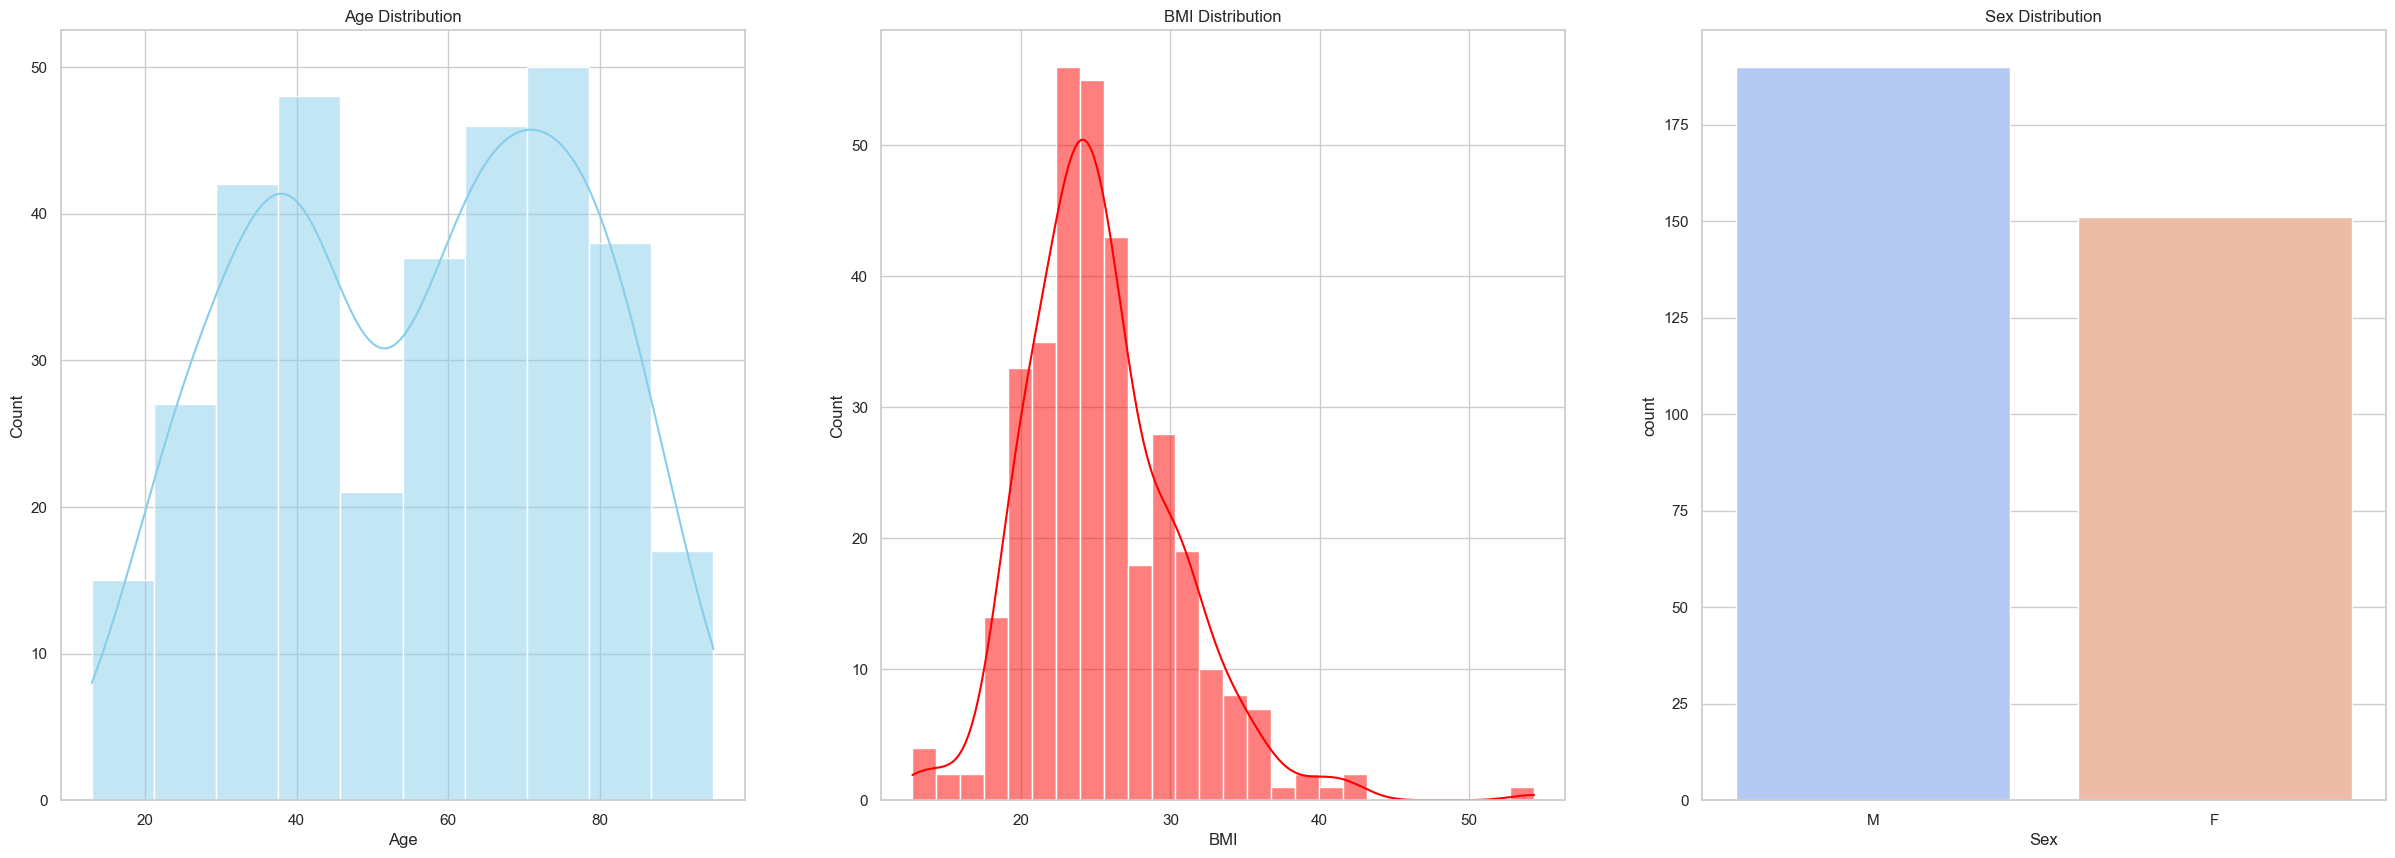

<Figure size 640x480 with 0 Axes>

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of seaborn
sns.set_style('whitegrid')

# Create a figure to hold the subplots
plt.figure(figsize=(30, 10))

# Age Distribution
plt.subplot(1, 3, 1)
sns.histplot(data['Age'], kde=True, color='skyblue')
plt.title('Age Distribution')

# BMI Distribution
plt.subplot(1, 3, 2)
sns.histplot(data['BMI'], kde=True, color='red')
plt.title('BMI Distribution')

# Plot the distribution of 'Sex'
plt.subplot(1, 3, 3)
sns.countplot(x='Sex', data=data, palette='coolwarm')
plt.title('Sex Distribution')
plt.show()

plt.tight_layout()
plt.show()

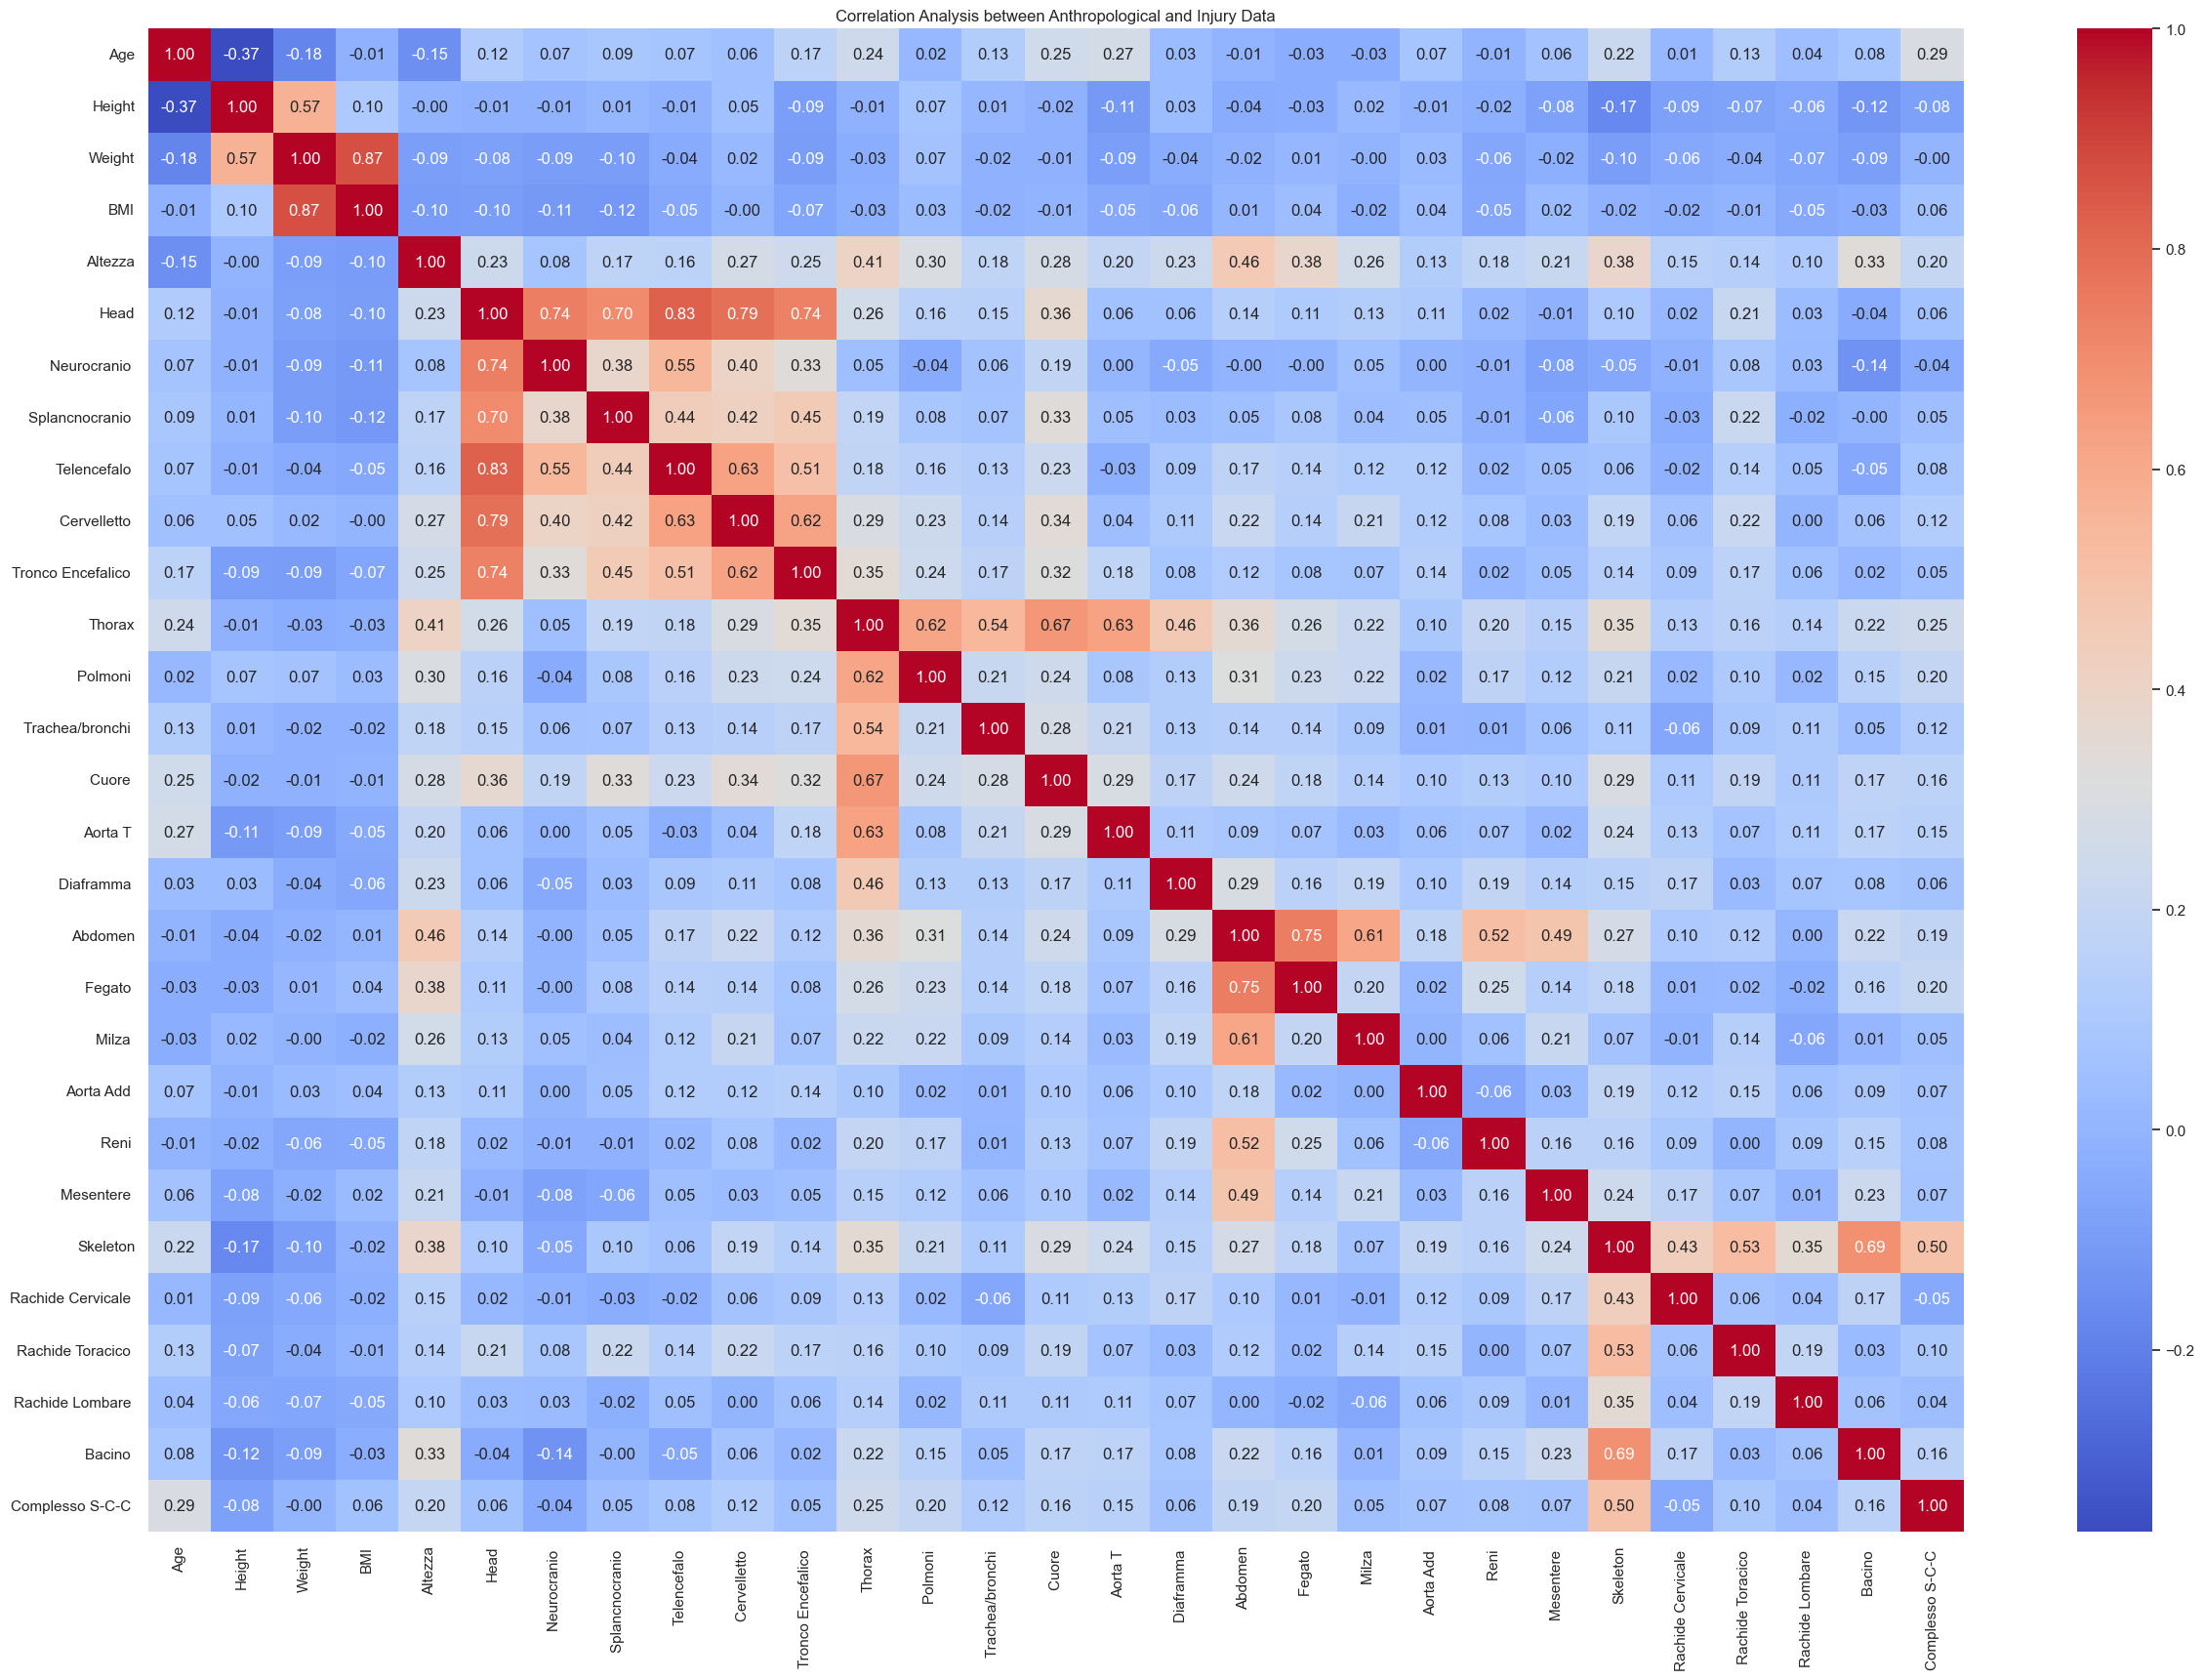

In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your dataframe is named 'data' and it includes both the anthropological and injury data

# Calculate the correlation matrix
correlation_matrix = data.corr()

# Use seaborn to create a heatmap to visualize the correlation matrix
plt.figure(figsize=(30, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Analysis between Anthropological and Injury Data')
plt.show()


In [1]:
    import pandas as pd
import numpy as np
import glob
from multiprocessing import cpu_count
from experiment_tools import *
from scikeras.wrappers import KerasClassifier,KerasRegressor
working_path = "C:\\Users\\lassa\\OneDrive\\Desktop\\workspace\\VICTIMS_OF_FALL_MASTER_THESIS"


In [3]:
%%time
import json

#This block run all the experiments
files = glob.glob(f"{working_path}\\input_exp\\default_models\\MLP-regressors\\*.json")
for file in files:
    print(file)
    with open (file, "r") as f:
        data=f.read().replace('\n', '')
    splits = file.split("\\")
    experiment_name = splits[-1].split(".")[0]
    experiment_setup = json.loads(data)
    print(f"EXECUTION OF THE EXPERIMENT {experiment_name}")
    experiment(working_path, "results\\default_models\\MLP-regressors", experiment_name, experiment_setup, "victims_of_fall_V1")

C:\Users\lassa\OneDrive\Desktop\workspace\VICTIMS_OF_FALL_MASTER_THESIS\input_exp\default_models\MLP-regressors\MLP - 7 - two layer.json
EXECUTION OF THE EXPERIMENT MLP - 7 - two layer
C:\Users\lassa\OneDrive\Desktop\workspace\VICTIMS_OF_FALL_MASTER_THESIS\input_exp\default_models\MLP-regressors\MLP - all - complete one layer.json
EXECUTION OF THE EXPERIMENT MLP - all - complete one layer
C:\Users\lassa\OneDrive\Desktop\workspace\VICTIMS_OF_FALL_MASTER_THESIS\input_exp\default_models\MLP-regressors\MLP - all - complete three layer.json
EXECUTION OF THE EXPERIMENT MLP - all - complete three layer
complete
n_iter:100
Fitting 10 folds for each of 10 candidates, totalling 100 fits


C:\Users\lassa\anaconda3\envs\env_3\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
C:\Users\lassa\anaconda3\envs\env_3\lib\site-packages\sklearn\model_selection\_search.py:296: UserWarning: The total space of parameters 10 is smaller than n_iter=100. Running 10 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,
C:\Users\lassa\anaconda3\envs\env_3\lib\site-packages\sklearn\model_selection\_search.py:296: UserWarning: The total space of parameters 10 is smaller than n_iter=100. Running 10 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,


Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV] END .................................................... total time= 4.9min
Fitting 10 folds for each of 10 candidates, totalling 100 fits


C:\Users\lassa\anaconda3\envs\env_3\lib\site-packages\sklearn\model_selection\_search.py:296: UserWarning: The total space of parameters 10 is smaller than n_iter=100. Running 10 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,


[CV] END .................................................... total time= 4.9min
Fitting 10 folds for each of 10 candidates, totalling 100 fits


C:\Users\lassa\anaconda3\envs\env_3\lib\site-packages\sklearn\model_selection\_search.py:296: UserWarning: The total space of parameters 10 is smaller than n_iter=100. Running 10 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,


[CV] END .................................................... total time= 5.0min
Fitting 10 folds for each of 10 candidates, totalling 100 fits


C:\Users\lassa\anaconda3\envs\env_3\lib\site-packages\sklearn\model_selection\_search.py:296: UserWarning: The total space of parameters 10 is smaller than n_iter=100. Running 10 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,


[CV] END .................................................... total time= 4.9min
Fitting 10 folds for each of 10 candidates, totalling 100 fits


C:\Users\lassa\anaconda3\envs\env_3\lib\site-packages\sklearn\model_selection\_search.py:296: UserWarning: The total space of parameters 10 is smaller than n_iter=100. Running 10 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,


[CV] END .................................................... total time= 4.9min
Fitting 10 folds for each of 10 candidates, totalling 100 fits


C:\Users\lassa\anaconda3\envs\env_3\lib\site-packages\sklearn\model_selection\_search.py:296: UserWarning: The total space of parameters 10 is smaller than n_iter=100. Running 10 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,


[CV] END .................................................... total time= 4.9min
Fitting 10 folds for each of 10 candidates, totalling 100 fits


C:\Users\lassa\anaconda3\envs\env_3\lib\site-packages\sklearn\model_selection\_search.py:296: UserWarning: The total space of parameters 10 is smaller than n_iter=100. Running 10 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,


[CV] END .................................................... total time= 4.9min
Fitting 10 folds for each of 10 candidates, totalling 100 fits


C:\Users\lassa\anaconda3\envs\env_3\lib\site-packages\sklearn\model_selection\_search.py:296: UserWarning: The total space of parameters 10 is smaller than n_iter=100. Running 10 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,


[CV] END .................................................... total time= 4.9min
Fitting 10 folds for each of 10 candidates, totalling 100 fits


C:\Users\lassa\anaconda3\envs\env_3\lib\site-packages\sklearn\model_selection\_search.py:296: UserWarning: The total space of parameters 10 is smaller than n_iter=100. Running 10 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,


[CV] END .................................................... total time= 4.9min
Fitting 10 folds for each of 10 candidates, totalling 100 fits


C:\Users\lassa\anaconda3\envs\env_3\lib\site-packages\sklearn\model_selection\_search.py:296: UserWarning: The total space of parameters 10 is smaller than n_iter=100. Running 10 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,


[CV] END .................................................... total time= 4.9min
C:\Users\lassa\OneDrive\Desktop\workspace\VICTIMS_OF_FALL_MASTER_THESIS\input_exp\default_models\MLP-regressors\MLP - all - complete two layer.json
EXECUTION OF THE EXPERIMENT MLP - all - complete two layer


C:\Users\lassa\anaconda3\envs\env_3\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
C:\Users\lassa\anaconda3\envs\env_3\lib\site-packages\sklearn\model_selection\_search.py:296: UserWarning: The total space of parameters 10 is smaller than n_iter=100. Running 10 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,


complete
n_iter:100
Fitting 10 folds for each of 10 candidates, totalling 100 fits


C:\Users\lassa\anaconda3\envs\env_3\lib\site-packages\sklearn\model_selection\_search.py:296: UserWarning: The total space of parameters 10 is smaller than n_iter=100. Running 10 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,


Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV] END .................................................... total time= 4.6min
Fitting 10 folds for each of 10 candidates, totalling 100 fits


C:\Users\lassa\anaconda3\envs\env_3\lib\site-packages\sklearn\model_selection\_search.py:296: UserWarning: The total space of parameters 10 is smaller than n_iter=100. Running 10 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,


[CV] END .................................................... total time= 4.6min
Fitting 10 folds for each of 10 candidates, totalling 100 fits


C:\Users\lassa\anaconda3\envs\env_3\lib\site-packages\sklearn\model_selection\_search.py:296: UserWarning: The total space of parameters 10 is smaller than n_iter=100. Running 10 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,


[CV] END .................................................... total time= 4.6min
Fitting 10 folds for each of 10 candidates, totalling 100 fits


C:\Users\lassa\anaconda3\envs\env_3\lib\site-packages\sklearn\model_selection\_search.py:296: UserWarning: The total space of parameters 10 is smaller than n_iter=100. Running 10 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,


[CV] END .................................................... total time= 4.6min
Fitting 10 folds for each of 10 candidates, totalling 100 fits


C:\Users\lassa\anaconda3\envs\env_3\lib\site-packages\sklearn\model_selection\_search.py:296: UserWarning: The total space of parameters 10 is smaller than n_iter=100. Running 10 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,


[CV] END .................................................... total time= 4.6min
Fitting 10 folds for each of 10 candidates, totalling 100 fits


C:\Users\lassa\anaconda3\envs\env_3\lib\site-packages\sklearn\model_selection\_search.py:296: UserWarning: The total space of parameters 10 is smaller than n_iter=100. Running 10 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,


[CV] END .................................................... total time= 4.6min
Fitting 10 folds for each of 10 candidates, totalling 100 fits


C:\Users\lassa\anaconda3\envs\env_3\lib\site-packages\sklearn\model_selection\_search.py:296: UserWarning: The total space of parameters 10 is smaller than n_iter=100. Running 10 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,


[CV] END .................................................... total time= 4.6min
Fitting 10 folds for each of 10 candidates, totalling 100 fits


C:\Users\lassa\anaconda3\envs\env_3\lib\site-packages\sklearn\model_selection\_search.py:296: UserWarning: The total space of parameters 10 is smaller than n_iter=100. Running 10 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,


[CV] END .................................................... total time= 4.5min
Fitting 10 folds for each of 10 candidates, totalling 100 fits


C:\Users\lassa\anaconda3\envs\env_3\lib\site-packages\sklearn\model_selection\_search.py:296: UserWarning: The total space of parameters 10 is smaller than n_iter=100. Running 10 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,


[CV] END .................................................... total time= 4.5min
Fitting 10 folds for each of 10 candidates, totalling 100 fits


C:\Users\lassa\anaconda3\envs\env_3\lib\site-packages\sklearn\model_selection\_search.py:296: UserWarning: The total space of parameters 10 is smaller than n_iter=100. Running 10 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,


[CV] END .................................................... total time= 4.5min
Wall time: 1h 44min 52s


In [3]:
##REGRESSION TASK RESULTS PROCESSING
import glob

files = glob.glob(f"{working_path}\\results\\default_models\\MLP-regressors\\*.json")
results = charge_results(files)
results = filter_and_sort_results(results, {"task" : "Regression", "cv_type" : "n_split_inner_cv"}, "neg_root_mean_squared_error")
results = score_results_exploding(results)


##REGRESSION RESULTS DISPLAY
names = {'dataset_variant': 'Dataset variant', 'estimator': 'Model', 'test_neg_root_mean_squared_error': 'RMSE', 'test_neg_mean_absolute_error' : 'MAE'}
df_table = results.filter(['dataset_variant', 'estimator', 'test_neg_root_mean_squared_error', 'test_neg_mean_absolute_error'])
df_table = df_table.rename(columns = names)


df_table = df_table.drop_duplicates(subset=['Model'],keep="first")
display(df_table)

{'test_neg_root_mean_squared_error': array([-1.2647782 , -1.36321799, -1.45563088, -1.94498694, -1.12075511,
       -1.55130538, -1.52817838, -1.90607578, -1.76939957, -1.42724883]), 'train_neg_root_mean_squared_error': array([-1.34870053, -1.4788415 , -1.34565585, -1.24700235, -1.33102414,
       -1.3415183 , -1.50858239, -1.31488035, -1.43724322, -1.43785407]), 'test_r2': array([0.61088398, 0.53186577, 0.4542327 , 0.06095809, 0.6733313 ,
       0.374135  , 0.3926568 , 0.06084697, 0.19070311, 0.47343083]), 'train_r2': array([0.53287082, 0.44055732, 0.53800123, 0.60165202, 0.54852637,
       0.54137923, 0.42003927, 0.55909217, 0.47321199, 0.47276411]), 'test_neg_mean_absolute_error': array([-0.97573903, -1.04874474, -1.05534362, -1.51116266, -0.9366544 ,
       -1.18209278, -1.23082229, -1.5365962 , -1.45253091, -1.10119727]), 'train_neg_mean_absolute_error': array([-1.05513615, -1.16023789, -1.04198272, -0.97546459, -1.04851466,
       -1.05070691, -1.1848606 , -1.01376126, -1.1232789

,Dataset variant,Model,RMSE,MAE
4,only_totals,"KerasRegressor(model=create_regression_model, ...",1.53 (std. 0.26),1.2 (std. 0.21)


In [26]:
##REGRESSION TASK RESULTS PROCESSING
import json
import glob

files = glob.glob(f"{working_path}\\results\\default_models\\MLP-regressors\\*.json")
results = charge_results(files)
results = filter_and_sort_results(results, {"task" : "Classification", "cv_type" : "n_split_inner_cv"}, "balanced_accuracy")
results = score_results_exploding(results)

In [27]:
results

,experiment_name,dataset_variant,estimator,task,hp_optimizer,cv_type,mean_test_score,mean_train_score,best_params,cv_results,experiment_setup,test_neg_root_mean_squared_error,train_neg_root_mean_squared_error,test_r2,train_r2,test_neg_mean_absolute_error,train_neg_mean_absolute_error,neg_root_mean_squared_error,r2,neg_mean_absolute_error
4,MLP - 7 - three layer,only_totals,"KerasRegressor(model=create_regression_model, ...",Regression,RandomizeSearchCV,n_split_inner_cv,{'neg_root_mean_squared_error': -1.53315770531...,{'neg_root_mean_squared_error': -1.37913026952...,"[{'scaler': MinMaxScaler(), 'feature_extractio...","{'fit_time': array([1803.91205072, 1803.606210...",{'dataset_settings': {'dataset_variants': ['co...,1.53 (std. 0.26),1.38 (std. 0.08),0.38 (std. 0.2),0.51 (std. 0.05),1.2 (std. 0.21),1.08 (std. 0.06),-1.533158,0.382304,-1.203088
1,MLP - 7 - one layer,only_totals,"KerasRegressor(model=create_regression_model, ...",Regression,RandomizeSearchCV,n_split_inner_cv,{'neg_root_mean_squared_error': -1.54057183281...,{'neg_root_mean_squared_error': -1.40482935082...,"[{'scaler': StandardScaler(), 'feature_extract...","{'fit_time': array([1235.80157995, 1226.383325...",{'dataset_settings': {'dataset_variants': ['co...,1.54 (std. 0.22),1.4 (std. 0.09),0.38 (std. 0.17),0.49 (std. 0.06),1.24 (std. 0.2),1.11 (std. 0.07),-1.540572,0.381091,-1.235928
0,MLP - 7 - one layer,complete,"KerasRegressor(model=create_regression_model, ...",Regression,RandomizeSearchCV,n_split_inner_cv,{'neg_root_mean_squared_error': -1.55852269243...,{'neg_root_mean_squared_error': -1.41658992717...,"[{'scaler': MinMaxScaler(), 'feature_extractio...","{'fit_time': array([1203.06451774, 1234.031395...",{'dataset_settings': {'dataset_variants': ['co...,1.56 (std. 0.22),1.42 (std. 0.08),0.37 (std. 0.18),0.49 (std. 0.06),1.23 (std. 0.18),1.12 (std. 0.07),-1.558523,0.366369,-1.228973
5,MLP - 7 - three layer,only_binary,"KerasRegressor(model=create_regression_model, ...",Regression,RandomizeSearchCV,n_split_inner_cv,{'neg_root_mean_squared_error': -1.55902600101...,{'neg_root_mean_squared_error': -1.51672109743...,"[{'scaler': MinMaxScaler(), 'feature_extractio...","{'fit_time': array([1774.05644011, 1795.266531...",{'dataset_settings': {'dataset_variants': ['co...,1.56 (std. 0.24),1.52 (std. 0.19),0.38 (std. 0.16),0.43 (std. 0.11),1.27 (std. 0.23),1.22 (std. 0.2),-1.559026,0.364526,-1.270870
6,MLP - 7 - two layer,complete,"KerasRegressor(model=create_regression_model, ...",Regression,RandomizeSearchCV,n_split_inner_cv,{'neg_root_mean_squared_error': -1.57998467564...,{'neg_root_mean_squared_error': -1.37717815374...,"[{'scaler': MinMaxScaler(), 'feature_extractio...","{'fit_time': array([1658.97324729, 1668.138998...",{'dataset_settings': {'dataset_variants': ['co...,1.58 (std. 0.21),1.38 (std. 0.09),0.35 (std. 0.18),0.51 (std. 0.06),1.25 (std. 0.18),1.08 (std. 0.08),-1.579985,0.349555,-1.247861
3,MLP - 7 - three layer,complete,"KerasRegressor(model=create_regression_model, ...",Regression,RandomizeSearchCV,n_split_inner_cv,{'neg_root_mean_squared_error': -1.58218482203...,{'neg_root_mean_squared_error': -1.44496741820...,"[{'scaler': MinMaxScaler(), 'feature_extractio...","{'fit_time': array([1778.00015545, 1787.653763...",{'dataset_settings': {'dataset_variants': ['co...,1.58 (std. 0.3),1.44 (std. 0.22),0.36 (std. 0.22),0.48 (std. 0.13),1.25 (std. 0.27),1.15 (std. 0.22),-1.582185,0.336170,-1.254485
8,MLP - 7 - two layer,only_binary,"KerasRegressor(model=create_regression_model, ...",Regression,RandomizeSearchCV,n_split_inner_cv,{'neg_root_mean_squared_error': -1.59026719404...,{'neg_root_mean_squared_error': -1.46595120170...,"[{'scaler': MinMaxScaler(), 'feature_extractio...","{'fit_time': array([1666.90333772, 1657.939773...",{'dataset_settings': {'dataset_variants': ['co...,1.59 (std. 0.2),1.47 (std. 0.06),0.34 (std. 0.17),0.45 (std. 0.04),1.27 (std. 0.18),1.17 (std. 0.05),-1.590267,0.342057,-1.273473
2,MLP - 7 - one layer,only_binary,"KerasRegressor(m

,Dataset variant,Model,RMSE,MAE
4,only_totals,"KerasRegressor(model=create_regression_model, ...",1.53 (std. 0.26),1.2 (std. 0.21)


In [12]:
names = {'Dataset':'Dataset','dataset_variant': 'Dataset variant', 'estimator': 'Model', 'test_balanced_accuracy': 'Balanced Accuracy'}
df_table = filtered_df.filter(['Dataset','dataset_variant', 'Floor Threshold','estimator', 'test_balanced_accuracy'])
df_table = df_table.rename(columns = names)

df_table = df_table.rename(columns = names)
df_table.Model = df_table.Model.apply(lambda x: x if x.find('(') == -1 else x[:x.find('(')])
#df_table = df_table.drop_duplicates(subset=['Dataset','Model'],keep="first")
df_table = df_table.drop_duplicates(subset=['Dataset','Model','Floor Threshold'],keep="first")
display(df_table)

,Dataset,Dataset variant,Floor Threshold,Model,Balanced Accuracy
66,Version 1,only_totals,2,SVC,0.78 (std. 0.06)
72,Version 1,only_totals,4,SVC,0.78 (std. 0.08)
38,Version 1,complete,3,RandomForestClassifier,0.77 (std. 0.07)
119,Version 2,only_totals,3,RandomForestClassifier,0.77 (std. 0.08)
111,Version 2,complete,3,KerasClassifier,0.77 (std. 0.09)
31,Version 1,complete,3,KerasClassifier,0.77 (std. 0.09)
146,Version 2,only_totals,2,SVC,0.77 (std. 0.08)
115,Version 2,complete,2,RandomForestClassifier,0.77 (std. 0.09)
110,Version 2,complete,2,KerasClassifier,0.76 (std. 0.09)
30,Version 1,complete,2,KerasClassifier,0.76 (std. 0.09)


In [61]:
names = {'Dataset':'Dataset','dataset_variant': 'Dataset variant', 'estimator': 'Model', 'test_neg_root_mean_squared_error': 'RMSE', 'test_r2': 'R squared', 'test_neg_mean_absolute_error' : 'MAE'}
df_table = filtered_df.filter(['Dataset','dataset_variant', 'estimator', 'test_neg_root_mean_squared_error', 'test_r2', 'test_neg_mean_absolute_error'])
df_table = df_table.rename(columns = names)
df_table.Model = df_table.Model.apply(lambda x: x if x.find('(') == -1 else x[:x.find('(')])
df_table = df_table.drop_duplicates(subset=['Dataset','Model'],keep="first")
display(df_table)

,Dataset,Dataset variant,Model,RMSE,R squared,MAE
19,Version 1,only_totals,SVR,1.47 (std. 0.25),0.43 (std. 0.19),1.15 (std. 0.2)
13,Version 1,only_totals,RandomForestRegressor,1.51 (std. 0.23),0.41 (std. 0.19),1.19 (std. 0.18)
40,Version 2,only_totals,SVR,1.52 (std. 0.14),0.39 (std. 0.11),1.2 (std. 0.11)
7,Version 1,only_totals,GradientBoostingRegressor,1.53 (std. 0.2),0.39 (std. 0.16),1.21 (std. 0.18)
28,Version 2,only_totals,GradientBoostingRegressor,1.55 (std. 0.12),0.37 (std. 0.1),1.23 (std. 0.11)
15,Version 1,complete,Ridge,1.55 (std. 0.17),0.38 (std. 0.13),1.25 (std. 0.14)
38,Version 2,only_binary,Ridge,1.56 (std. 0.14),0.37 (std. 0.11),1.26 (std. 0.09)
33,Version 2,complete,RandomForestRegressor,1.56 (std. 0.12),0.37 (std. 0.1),1.22 (std. 0.11)
30,Version 2,complete,LogisticRegression,1.92 (std. 0.18),0.16 (std. 0.06),1.37 (std. 0.12)
10,Version 1,only_totals,LogisticRegression,1.95 (std. 0.29),0.23 (std. 0.2),1.43 (std. 0.23)


In [36]:
latex=df_table.style.hide_index().to_latex()

text_file = open("sample.txt", "w")
text_file.write(latex)
text_file.close()

In [191]:
names = {'dataset_variant': 'Dataset variant', 'estimator': 'Model', 'test_accuracy': 'Accuracy'}
df_table = filtered_df.filter(['dataset_variant', 'estimator', 'test_accuracy'])
df_table = df_table.rename(columns = names)

name_model = "ChainedEstimator"
filtered_table = df_table[:0]
estimators = {}
for index, row in df_table.iterrows():

    if estimators.get(row.Model) == None and name_model in row.Model:
        str_regressor = 'regressor = '
        i_regressor = row.Model.find('regressor = ')
        i_comma = row.Model.find(',')

        regressor = row.Model[i_regressor+len(str_regressor):i_comma]
        i_p = regressor.find('(')
        regressor = regressor[:i_p]
        row['Regressor'] = regressor
        
        str_clf = 'clf = '
        i_clf = row.Model.find(str_clf)
        clf = row.Model[i_clf+len(str_clf):]
        i_p = clf.find('(')
        clf = clf[:i_p]
        row['Classifier'] = clf
        print(regressor)
        print(clf)

        estimators[row.Model] = 1
        filtered_table = filtered_table.append(row)
        

RandomForestClassifier
RidgeClassifier
RandomForestRegressor
SVC
GradientBoostingRegressor
SVC
RandomForestRegressor
DecisionTreeClassifier


In [117]:
best_results = filtered_df.iloc[0]
cv_result = best_results.cv_results.replace("\n",'')
cv_result = cv_result.replace(" ", '')
try:
    cv_dic = eval(best_results.cv_results)
except:
    i_scoring = cv_result.rfind("scoring")
    i_test = cv_result[i_scoring:].find("'test")
    cv_result = "{"+cv_result[i_scoring+i_test:]
metrics = best_results.experiment_setup['hp_optimizer']['metrics']
for metric in metrics:
    print(cv_dic[f"test_{metric}"])
    print(cv_dic[f"train_{metric}"])

NameError: name 'cv_dic' is not defined

In [179]:
best_results.experiment_setup

{'dataset_settings': {'dataset_variants': ['complete',
   'only_totals',
   'only_binary'],
  'type_of_labels': 'floors',
  'only_BMI': 1},
 'task': 'Regression',
 'pipe': {'feature_extraction': 'GroupedSVD(mask=mask)',
  'scaler': 'MinMaxScaler()',
  'estimator': "RandomForestRegressor(criterion = 'squared_error')"},
 'hp_optimizer': {'type': 'RandomizeSearchCV',
  'n_iter': 100,
  'params': [{'feature_extraction__n_components': '[1, 2, 3]',
    'estimator__n_estimators': '[100, 200, 250]',
    'estimator__max_depth': '[10, 15]',
    'estimator__max_features': "['sqrt', 'log2']"}],
  'metrics': ['neg_root_mean_squared_error', 'r2', 'neg_mean_absolute_error'],
  'n_split_outer_cv': 10,
  'n_split_inner_cv': 10}}

In [177]:
eval(best_results.best_params)[1]

{'feature_extraction__n_components': 2,
 'estimator__n_estimators': 200,
 'estimator__max_features': 'sqrt',
 'estimator__max_depth': 10}

In [20]:
filtered_df['best_params'][25]

"[{'feature_extraction__n_components': 2, 'estimator__n_estimators': 250, 'estimator__max_features': 'sqrt', 'estimator__max_depth': 15}, {'feature_extraction__n_components': 2, 'estimator__n_estimators': 200, 'estimator__max_features': 'sqrt', 'estimator__max_depth': 10}, {'feature_extraction__n_components': 2, 'estimator__n_estimators': 200, 'estimator__max_features': 'log2', 'estimator__max_depth': 10}, {'feature_extraction__n_components': 1, 'estimator__n_estimators': 200, 'estimator__max_features': 'sqrt', 'estimator__max_depth': 15}, {'feature_extraction__n_components': 2, 'estimator__n_estimators': 250, 'estimator__max_features': 'log2', 'estimator__max_depth': 15}, {'feature_extraction__n_components': 2, 'estimator__n_estimators': 200, 'estimator__max_features': 'log2', 'estimator__max_depth': 15}, {'feature_extraction__n_components': 1, 'estimator__n_estimators': 200, 'estimator__max_features': 'sqrt', 'estimator__max_depth': 10}, {'feature_extraction__n_components': 2, 'estim

In [19]:
filtered_df['estimator'][25]

"RandomForestRegressor(criterion = 'squared_error')"

In [121]:
filtered_df.iloc[2].best_params

"[{'feature_extraction__n_components': 4, 'estimator__tol': 0.0001, 'estimator__kernel': 'rbf', 'estimator__epsilon': 1e-05, 'estimator__C': 0.5}, {'feature_extraction__n_components': 4, 'estimator__tol': 0.001, 'estimator__kernel': 'rbf', 'estimator__epsilon': 0.001, 'estimator__C': 0.5}, {'feature_extraction__n_components': 5, 'estimator__tol': 0.001, 'estimator__kernel': 'rbf', 'estimator__epsilon': 0.01, 'estimator__C': 1.0}, {'feature_extraction__n_components': 4, 'estimator__tol': 0.001, 'estimator__kernel': 'rbf', 'estimator__epsilon': 0.001, 'estimator__C': 0.5}, {'feature_extraction__n_components': 5, 'estimator__tol': 0.0001, 'estimator__kernel': 'rbf', 'estimator__epsilon': 0.001, 'estimator__C': 0.5}, {'feature_extraction__n_components': 4, 'estimator__tol': 0.001, 'estimator__kernel': 'rbf', 'estimator__epsilon': 0.01, 'estimator__C': 0.5}, {'feature_extraction__n_components': 4, 'estimator__tol': 0.0001, 'estimator__kernel': 'rbf', 'estimator__epsilon': 1e-05, 'estimator_